In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/MSDS/Capstone/MSDS Capstone/Sean's Work/Book 3 (4).xlsx")

In [4]:
df.head()

,Type,Summary,Link
0,NonFus,Diagnostic imaging plays a critical role in he...,NaN
1,NonFus,Machine learning (ML) methods are pervading an...,NaN
2,NonFus,Prostate Cancer (PCa) is the third most common...,NaN
3,NonFus,Despite the wide availability of ultrasound ma...,NaN
4,NonFus,Clinical Decision Support Systems (CDSS) provi...,NaN


In [5]:
df = df.drop('Link',axis=1)

In [6]:
len(df)

90

In [7]:
df['Type'].value_counts()

Type
NonFus    49
Fus       41
Name: count, dtype: int64

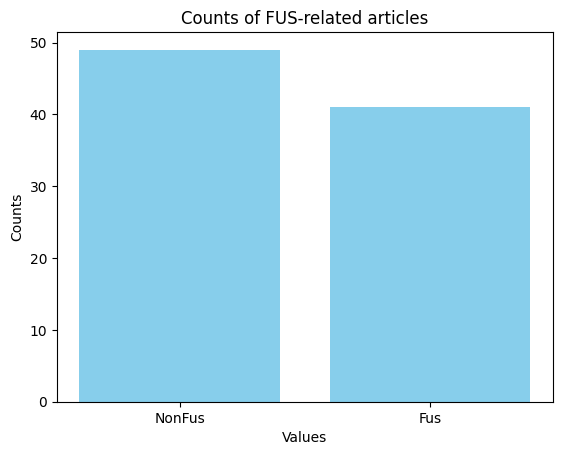

In [8]:
# Compute value counts
value_counts = df['Type'].value_counts()

# Plot bar graph
plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Counts of FUS-related articles')
plt.show()

In [9]:
X = df['Summary']
y = df['Type']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)

tfidf = TfidfVectorizer(stop_words='english')


#kinda like scaling here
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_tfidf = tfidf.fit_transform(X)

In [10]:
df.isna().sum()

Type       0
Summary    0
dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

matrix = cv.fit_transform(df[df['Type']=='NonFus']['Summary'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print("Top 20 words used for Non-FUS Articles.")
print(sorted(freqs, key=lambda x: -x[1])[:40])

Top 20 words used for Non-FUS Articles.
[('learning', 162), ('ultrasound', 106), ('machine', 105), ('data', 71), ('imaging', 68), ('deep', 51), ('ml', 48), ('clinical', 44), ('methods', 43), ('used', 43), ('using', 41), ('techniques', 38), ('review', 36), ('diagnosis', 35), ('cancer', 31), ('models', 31), ('neural', 30), ('applications', 29), ('breast', 29), ('medicine', 29), ('ai', 28), ('algorithms', 26), ('analysis', 26), ('model', 26), ('image', 25), ('research', 25), ('accuracy', 24), ('images', 24), ('based', 23), ('classification', 23), ('network', 23), ('artificial', 21), ('detection', 21), ('patient', 21), ('study', 21), ('care', 20), ('disease', 20), ('performance', 20), ('recent', 20), ('support', 20)]


In [12]:
cv = CountVectorizer(stop_words='english')

matrix = cv.fit_transform(df[df['Type']=='Fus']['Summary'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print("Top 20 words used for FUS reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:40])

Top 20 words used for FUS reviews.
[('ultrasound', 101), ('focused', 63), ('hifu', 61), ('treatment', 41), ('high', 39), ('fus', 37), ('intensity', 27), ('ablation', 26), ('therapy', 25), ('tissue', 25), ('study', 24), ('brain', 22), ('model', 22), ('guided', 21), ('clinical', 20), ('learning', 20), ('used', 20), ('using', 20), ('cavitation', 19), ('therapeutic', 19), ('based', 18), ('blood', 18), ('imaging', 18), ('results', 18), ('uterine', 18), ('non', 17), ('thermal', 17), ('acoustic', 16), ('delivery', 16), ('fibroids', 16), ('image', 16), ('invasive', 16), ('machine', 16), ('tumor', 16), ('use', 16), ('bbb', 15), ('control', 15), ('liver', 15), ('volume', 15), ('mri', 14)]


In [13]:
#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [14]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000000)

log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=10000000)

In [15]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC,LinearSVC

rbf_svc = SVC(probability=True)
rbf_svc.fit(X_train_tfidf,y_train)

SVC(probability=True)

In [16]:
linear_svc = LinearSVC(dual=True)
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

def test_model(model):

    y_preds = model.predict(X_test_tfidf)
    print(confusion_matrix(y_test,y_preds))
    print('\n')
    print(classification_report(y_test,y_preds))

In [18]:
#NAIVE BAYES
test_model(nb)

[[14  0]
 [ 0 16]]


              precision    recall  f1-score   support

         Fus       1.00      1.00      1.00        14
      NonFus       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
#LOGISTIC REGRESSION
test_model(log_model)

[[13  1]
 [ 0 16]]


              precision    recall  f1-score   support

         Fus       1.00      0.93      0.96        14
      NonFus       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [20]:
#SUPPORT VECTOR MACHINE
test_model(rbf_svc)

[[13  1]
 [ 0 16]]


              precision    recall  f1-score   support

         Fus       1.00      0.93      0.96        14
      NonFus       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [21]:
#LINEAR SUPPORT VECTOR MACHINE
test_model(linear_svc)

[[14  0]
 [ 0 16]]


              precision    recall  f1-score   support

         Fus       1.00      1.00      1.00        14
      NonFus       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
from sklearn.pipeline import Pipeline #use the pipeline for final model
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC(kernel='linear',probability=True))])

pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', probability=True))])

In [23]:
predicted_probs = pipe.predict_proba(['''Transrectal ultrasound is commonly used for guiding prostate cancer biopsy, where 3D ultrasound volume reconstruction is often desired. Current methods for 3D reconstruction from freehand ultrasound scans require external tracking devices to provide spatial information of an ultrasound transducer. This paper presents a novel deep learning approach for sensorless ultrasound volume reconstruction, which efficiently exploits content correspondence between ultrasound frames to reconstruct 3D volumes without external tracking. The underlying deep learning model, deep contextual-contrastive network (DC 2-Net), utilizes self-attention to focus on the speckle-rich areas to estimate spatial movement and then minimizes a margin ranking loss for contrastive feature learning. A case-wise correlation loss over the entire input video helps further smooth the estimated trajectory. We train and validate DC 2-Net on two independent datasets, one containing 619 transrectal scans and the other having 100 transperineal scans. Our proposed approach attained superior performance compared with other methods, with a drift rate of 9.64 % and a prostate Dice of 0.89. The promising results demonstrate the capability of deep neural networks for universal ultrasound volume reconstruction from freehand 2D ultrasound scans without tracking information.'''])

In [24]:
classes = pipe.classes_

predicted_probabilities = predicted_probs[0]

# Zip the classes with the predicted probabilities
class_probabilities = zip(classes, predicted_probabilities)

# Print the class labels and their corresponding probabilities
for class_label, probability in class_probabilities:
    print(f"Class: {class_label}, Probability: {probability}")

Class: Fus, Probability: 0.20438330140113953
Class: NonFus, Probability: 0.7956166985988603


In [25]:
from joblib import dump,load

dump(pipe,'fus_model.joblib')

['fus_model.joblib']

In [26]:
linear = SVC(kernel='linear',probability=True)

from sklearn.model_selection import GridSearchCV

C = np.logspace(0.01,0.1,1,10,100)

param_grid = {'C':C}

grid_model = GridSearchCV(linear,param_grid=param_grid)

grid_model.fit(X_train_tfidf,y_train)

grid_model.best_params_

{'C': 1.0471285480508996}

In [27]:
def pip(summary):
    prediction = pipe.predict_proba([summary])
    percentage = (prediction[0][0])*100
    return 'Focused Ultrasound Related: ' + str((round(percentage,1)))+'%'

In [29]:
pip('''The sun dipped low on the horizon, casting long shadows across the golden fields. A gentle breeze rustled through the trees, carrying with it the sweet scent of wildflowers. Birds chirped merrily in the distance, their songs echoing through the tranquil countryside. As evening approached, the sky was painted with hues of orange and pink, a stunning display of nature's beauty. It was a peaceful scene, a moment of quiet reflection in a busy world.''')

'Focused Ultrasound Related: 75.3%'